# SENTIMENT ANALYSIS OF RESTAURANT REVIEWS

# problem statement 

Normally, a lot of businesses are remained as failures due to lack of profit, lack of proper improvement measures. Mostly, restaurant owners face a lot of difficulties to improve their productivity. This project really helps those who want to increase their productivity, which in turn increases their business profits. This is the main objective of this project.

What the project does is that the restaurant owner gets to know about drawbacks of his restaurant such as most disliked food items of his restaurant by customer’s text review which is processed with ML classification algorithm(Naive Bayes)



The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression. In the end, we hope to find a "best" model for predicting the review's sentiment.



In [3]:
# Here we have imported all necessory libraries .

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Here we have a text dataset where "Review" is input feature and "Liked" is output feature
# We have total 1386 records in dataset
# In output column It is classified into two classes 0 and 1 (1=Positive review , 0=Negative review)
# Based on total reviews we will build a model.

In [6]:
# Read Dataset

df=pd.read_csv('r_data.tsv',delimiter='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
1381,clean,1
1382,less,0
1383,clean,1
1384,less,0


In [ ]:
# We check the shape of data (rows, columns)

In [4]:
df.shape

(1386, 2)

In [ ]:
# Checked pulicates values or records :

In [7]:
# Here we Got 373 Duplicate records which we can remove 
# If we don't remove then it doenst matter on model if it is less.

In [8]:
df.duplicated().sum()

373

In [9]:
# We have checked Null/Missing values 

# No Null/Missing values are present in dataset.

In [11]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [12]:
# We have checked label data 
# dataset is balanced 

In [16]:
s1=df['Liked'].value_counts()
s1

1    792
0    594
Name: Liked, dtype: int64

In [18]:
# 1.......Its Positive review/positive
# 0.......Its Negative reviews/negative

In [19]:
# DATASET IS BALANCED

In [20]:
# Graphical representation of output feature

<AxesSubplot:>

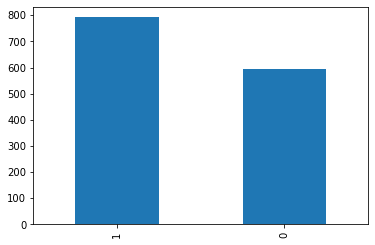

In [21]:
s1.plot(kind='bar')

In [22]:
# TEXT PREPROCESSING

In [24]:
import nltk                             #(nltk....natural language took kit)
from nltk.corpus import stopwords       # remove stopwords(most repeated-a,an, the)
import re
from nltk.stem import PorterStemmer     # stemming (love,lovable,loved etc)


In [25]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [26]:
stopwords.words('english')   

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
len(stopwords.words('english'))

179

In [28]:
## Text preprocessing
# remove special characters/digit
# remove stopwords(most repeated-a,an, the )
# stemming (love,lovable,loved etc)(to find stem words)(effect, effecting, effection =effect It consider it only)

In [29]:
corpus=[]
for i in range(len(df)):
    # remove special characters and digits
    mystr=re.sub('[^A-Za-z\s]','',df['Review'][i])
    # lower case
    mystr=mystr.lower()
    # tokenization
    list1=mystr.split()
    # remove stopwords
    list2=[ i for i in list1 if i not in set(stopwords.words('english'))]
    # stemming
    ps=PorterStemmer()
    list3=[ ps.stem(i) for i in list2]
    # original string
    final=' '.join(list3)
    corpus.append(final)

# VECTORIZATION

In [30]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti didnt tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberrymmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'that rightth red velvet cakeohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'foun

In [31]:
from sklearn.feature_extraction.text import CountVectorizer       # It convert text data into numerical data 
cv=CountVectorizer()

In [32]:
cv.fit_transform(corpus)

<1386x1612 sparse matrix of type '<class 'numpy.int64'>'
	with 5868 stored elements in Compressed Sparse Row format>

In [37]:
X=cv.fit_transform(corpus).toarray()
y=df['Liked']

In [38]:
X.shape

(1386, 1612)

In [39]:
# import pickle
# f=open('cv.pkll','wb')
# pickle.dump(cv,f)
# f.close()

In [40]:
# CROSS VALIDATION

In [126]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=12)

In [127]:
# MODEL TRAINING

In [128]:
#1. MULTINOMIAL NB 

In [129]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(Xtrain,ytrain)

MultinomialNB()

In [130]:
print(clf.score(Xtest,ytest))
print(clf.score(Xtrain,ytrain))

0.841726618705036
0.9404332129963899


In [131]:
from sklearn.naive_bayes import MultinomialNB
clf1= MultinomialNB()
clf1.fit(Xtrain, ytrain)
# Predicting the Test set results
ypred = clf1.predict(Xtest)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(ytest, ypred))
score1 = accuracy_score(ytest,ypred)
score2 = precision_score(ytest,ypred)
score3= recall_score(ytest,ypred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 91  30]
 [ 14 143]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.75      0.81       121
           1       0.83      0.91      0.87       157

    accuracy                           0.84       278
   macro avg       0.85      0.83      0.84       278
weighted avg       0.84      0.84      0.84       278



Accuracy is  84.17 %
Precision is  0.83
Recall is  0.91


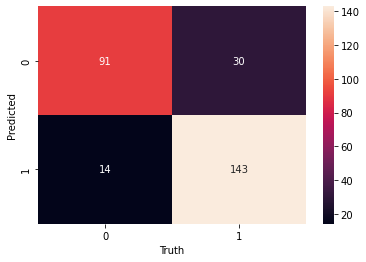

In [132]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

In [133]:
from sklearn.naive_bayes import BernoulliNB
clf2= BernoulliNB()
clf2.fit(Xtrain, ytrain)
# Predicting the Test set results
y_pred = clf2.predict(Xtest)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(ytest, ypred))
score1 = accuracy_score(ytest,ypred)
score2 = precision_score(ytest,ypred)
score3= recall_score(ytest,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 91  30]
 [ 14 143]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.75      0.81       121
           1       0.83      0.91      0.87       157

    accuracy                           0.84       278
   macro avg       0.85      0.83      0.84       278
weighted avg       0.84      0.84      0.84       278



Accuracy is  84.17 %
Precision is  0.83
Recall is  0.93


In [134]:
from sklearn.linear_model import LogisticRegression
clf3= LogisticRegression()
clf3.fit(Xtrain, ytrain)
# Predicting the Test set results
y_pred = clf3.predict(Xtest)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(ytest, ypred))
score1 = accuracy_score(ytest,ypred)
score2 = precision_score(ytest,ypred)
score3= recall_score(ytest,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[ 91  30]
 [ 14 143]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.75      0.81       121
           1       0.83      0.91      0.87       157

    accuracy                           0.84       278
   macro avg       0.85      0.83      0.84       278
weighted avg       0.84      0.84      0.84       278



Accuracy is  84.17 %
Precision is  0.83
Recall is  0.86


In [135]:
## Multinomial NB is good algorithm by using cross validation score

In [136]:
# import pickle
# f=open('cv.pkll','wb')
# pickle.dump(clf1,f)
# f.close()

In [144]:
a='very bad food'        # we just predicted review here

In [145]:
a_cv=cv.transform([a]).toarray()

In [146]:
clf1.predict(a_cv)           # 0 means negative review

array([0], dtype=int64)

In [147]:
b='nice and good food'

In [148]:
a_cv=cv.transform([b]).toarray()

In [150]:
res=clf1.predict(a_cv)       # 1 Means positive review
res

array([1], dtype=int64)

In this study, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques. Two algorithms namely Multinomial Naive Bayes and Bernoulli Naive Bayes are implemented.
Evaluation metrics used here are accuracy, precision and recall.
Using Multinomial Naive Bayes, Accuracy of prediction is 77.33%. Precision of prediction is 0.78. Recall of prediction is 0.77.
Using Bernoulli Naive Bayes, Accuracy of prediction is 76.67%. Precision of prediction is 0.76. Recall of prediction is 0.78.
Using Logistic Regression, Accuracy of prediction is 83.09%. Precision of prediction is 0.81. Recall of prediction is 0.91.
From the above results, Multinomial Naive Bayes is slightly better method compared to Bernoulli Naive Bayes and Logistic Regression, with 77.33% accuracy which means the model built for the prediction of sentiment of the restaurant review gives 77.33% right predictio